In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BNB.csv',sep=";")
df1=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 3s 75ms/step - loss: 0.0308 - val_loss: 7.4860e-04
Epoch 2/100
19/19 [==============================] - 1s 47ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 3/100
19/19 [==============================] - 1s 43ms/step - loss: 9.1119e-04 - val_loss: 6.2932e-04
Epoch 4/100
19/19 [==============================] - 1s 39ms/step - loss: 8.0798e-04 - val_loss: 5.3859e-04
Epoch 5/100
19/19 [==============================] - 1s 42ms/step - loss: 7.3535e-04 - val_loss: 6.3564e-04
Epoch 6/100
19/19 [==============================] - 1s 44ms/step - loss: 6.9988e-04 - val_loss: 5.8166e-04
Epoch 7/100
19/19 [==============================] - 1s 42ms/step - loss: 6.7185e-04 - val_loss: 5.2011e-04
Epoch 8/100
19/19 [==============================] - 1s 47ms/step - loss: 6.4432e-04 - val_loss: 7.0622e-04
Epoch 9/100
19/19 [==============================] - 1s 44ms/step - loss: 6.5179e-04 - val_loss: 5.6426e-04
Epoch 10/100
19/19 [====================

19/19 [==============================] - 1s 46ms/step - loss: 4.0640e-04 - val_loss: 3.1898e-04
Epoch 77/100
19/19 [==============================] - 1s 45ms/step - loss: 4.0840e-04 - val_loss: 4.2292e-04
Epoch 78/100
19/19 [==============================] - 1s 45ms/step - loss: 3.9365e-04 - val_loss: 3.0275e-04
Epoch 79/100
19/19 [==============================] - 1s 43ms/step - loss: 4.1061e-04 - val_loss: 3.1650e-04
Epoch 80/100
19/19 [==============================] - 1s 43ms/step - loss: 4.0252e-04 - val_loss: 3.9339e-04
Epoch 81/100
19/19 [==============================] - 1s 46ms/step - loss: 4.0097e-04 - val_loss: 3.7971e-04
Epoch 82/100
19/19 [==============================] - 1s 43ms/step - loss: 3.9065e-04 - val_loss: 5.7516e-04
Epoch 83/100
19/19 [==============================] - 1s 45ms/step - loss: 4.0994e-04 - val_loss: 3.1262e-04
Epoch 84/100
19/19 [==============================] - 1s 41ms/step - loss: 4.0439e-04 - val_loss: 3.3264e-04
Epoch 85/100
19/19 [============

In [10]:
# Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

3/3 [==============================] - 0s 8ms/step


In [11]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval)) * 100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 0.0325742963919058
Testing RMSE: 0.12963154770255453
Validation MAPE: 5.626295642516861
Testing MAPE: 22.826336238167578
Validation MAE: 0.025663053089290466
Testing MAE: 0.10268822861820544


In [12]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

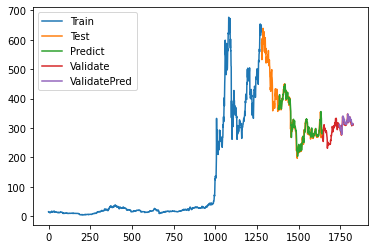

In [13]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()